In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Genetic drift

In [4]:
# N- population size, p - allele A frequency, t - number of generation

def WF_simulation(N, p, t):
    
    # allele B frequency
    q = 1 - p
    
    population = np.random.choice([0, 1], size = N, p = [p, q])
    
    A_freq = []
    B_freq = []
    
    for generation in range(t):
        # calculate allele frequencies 
        freq_A = np.sum(population == 0) / N
        freq_B = np.sum(population == 1) / N

        A_freq.append(freq_A)
        B_freq.append(freq_B)
        
        next_generation = np.random.choice(population, size=N)
        
        population = next_generation
        
    return (A_freq, B_freq)

##  1.a trace the allele frequencies over time; 

In [25]:
a_freq, b_freq = WF_simulation(1000, 0.5, 10000)

In [26]:
def plot_frequencys(A_allele, B_allele):
    # Plot the results
    plt.plot(range(len(A_allele)), a_freq, label='Allele A', marker='o', linestyle='-', color='b')
    plt.plot(range(len(B_allele)), b_freq, label='Allele B', marker='o', linestyle='-', color='r')
    plt.title('Wright-Fisher Simulation')
    plt.xlabel('Generations')
    plt.ylabel('Allele Frequency')
    plt.legend()
    plt.show()

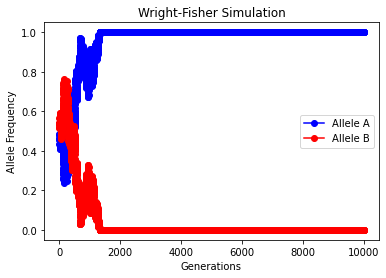

In [28]:
plot_frequencys(a_freq, b_freq)

## 1.b Determine the fixation probability of allele A in dependence of p

In [57]:
def find_fixation_A(freq_a):
    flag = 0
    if (1 in freq_a):
        flag = 1
        #fix_allele = 'A'
    return flag

In [52]:
mean_value

1498.87

In [61]:
def fixation_a_allele (n_simulations, p_A):   
    A_fixation = 0
    for i in range(n_simulations):
        a_freq, b_freq = WF_simulation(1000, p_A, 10000)
        
        #check if A fixed
        if (1 in a_freq):
            A_fixation += 1
    A_fix_proba = round(A_fixation/n_simulations, 2)
    return A_fix_proba

In [62]:
check = fixation_a_allele(100, 0.5)

In [63]:
check

0.42

In [70]:
p_list = []
for i in range(1, 10):
    p_list.append(i / 10.0)
p_list

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [65]:
fix_a_for_diff_p = []
for pa in p_list:
    fix_a_for_diff_p.append(fixation_a_allele(100, pa))

In [66]:
# 
fix_a_for_diff_p

[0.12, 0.23, 0.35, 0.39, 0.52, 0.66, 0.74, 0.78, 0.87]

In [67]:
p_list

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

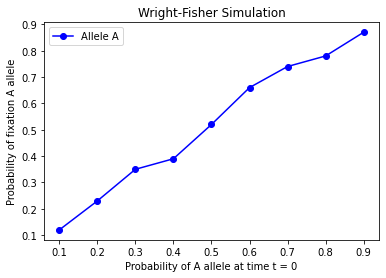

In [69]:
plt.plot(p_list, fix_a_for_diff_p, label='Allele A', marker='o', linestyle='-', color='b')
plt.title('Wright-Fisher Simulation')
plt.xlabel('Probability of A allele at time t = 0')
plt.ylabel('Probability of fixation A allele')
plt.legend()
plt.show()

## 1.c Estimate the expected fixation time (number of generations) in dependence of N (haploid individuals)

In [71]:
def find_fixation_t(freq_list):
    if (1 in freq_list):
        index = freq_list.index(1)
    else:
        index = freq_list.index(0)
    return index

In [95]:
N_list = [10, 50, 100, 200, 300, 400, 500, 600, 1000, 2000]

In [73]:
def estimate_expected_fix_time(population_size):
    
    # list with number of generation until fixation
    fix_time = []

    for i in range(100):
        a_freq, b_freq = WF_simulation(population_size, 0.5, 10000)
        fix_time.append(find_fixation_t(a_freq))
        
    #mean of fix_time for 100 simaulations
    mean_fix_time = np.mean(fix_time)
    
    return mean_fix_time

In [74]:
estimate_expected_fix_time(1000)

1385.59

In [91]:
mean_fix_time_list = []
for pop_size in N_list:
    x = estimate_expected_fix_time(pop_size)
    mean_fix_time_list.append(x)
    print(f'For population size = {pop_size}, expected fixation time (number of generations) = {x} generations \n')

For population size = 10, expected fixation time (number of generations) = 12.18 generations 

For population size = 50, expected fixation time (number of generations) = 67.46 generations 

For population size = 100, expected fixation time (number of generations) = 141.68 generations 

For population size = 200, expected fixation time (number of generations) = 255.94 generations 

For population size = 300, expected fixation time (number of generations) = 430.5 generations 

For population size = 400, expected fixation time (number of generations) = 504.36 generations 

For population size = 500, expected fixation time (number of generations) = 690.64 generations 

For population size = 600, expected fixation time (number of generations) = 825.17 generations 

For population size = 1000, expected fixation time (number of generations) = 1265.16 generations 

For population size = 2000, expected fixation time (number of generations) = 2654.98 generations 



ValueError: 0 is not in list

In [93]:
mean_fix_time_list

[12.18, 67.46, 141.68, 255.94, 430.5, 504.36, 690.64, 825.17, 1265.16, 2654.98]

In [96]:
N_list

[10, 50, 100, 200, 300, 400, 500, 600, 1000, 2000]

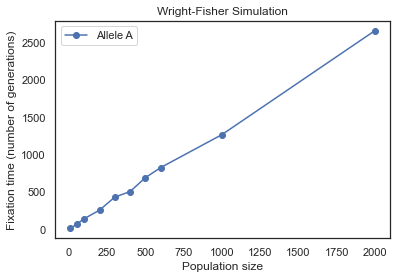

In [97]:
plt.plot(N_list, mean_fix_time_list, label='Allele A', marker='o', linestyle='-', color='b')
plt.title('Wright-Fisher Simulation')
plt.xlabel('Population size')
plt.ylabel('Fixation time (number of generations)')
plt.legend()
plt.show()

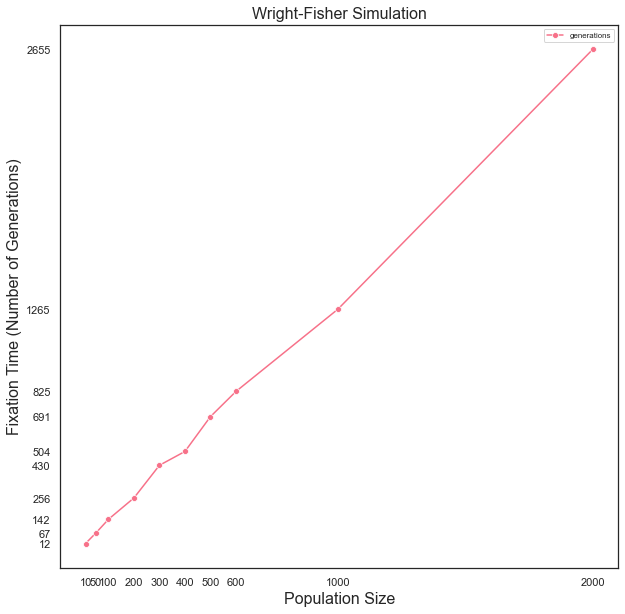

In [108]:
import seaborn as sns


# Set Seaborn style
sns.set(style="white")

# Plot with Seaborn
plt.figure(figsize=(10, 10))

# Use Seaborn's color palette for better aesthetics
palette = sns.color_palette("husl", 2)

sns.lineplot(x=N_list, y=mean_fix_time_list, marker='o', color=palette[0], label='generations')

plt.title('Wright-Fisher Simulation', fontsize=16)
plt.xlabel('Population Size', fontsize=16)
plt.ylabel('Fixation Time (Number of Generations)', fontsize=16)

plt.xticks(N_list)
plt.yticks(mean_fix_time_list)

plt.legend(fontsize=8)
plt.show()

# 2. Coalescent model

In [118]:
len(set(population))

100

In [224]:
def simulate_populations_for_CE(N):    
    #initialisation 
    population = np.array([[i, -1] for i in range(N)])
    populations = []
    populations.append(population)

    flag = 0
    # stop when all common by descent
    while flag == 0:

        next_generation = np.zeros((N, 2))
        population = populations[-1]
        for individual in next_generation:
            parents = np.random.choice(N, size=N)
            for parent in parents:
                individual[0] = population[parent][0]
                individual[1] = parent

        populations.append(next_generation)
        invividuals = [invividual[0] for invividual in next_generation]

        if len(set(invividuals)) == 1:
            flag = 1
        
    return populations

In [229]:
check = simulate_populations_for_CE(100)

In [214]:
print (f'Number of generations N = {len(populations)}')

Number of generations N = 199


In [211]:
# number of samples
n = 2
def find_coalescent_event(n):
    check_parents_samples = np.random.choice(100, size=n)
    t = 1
    flag = 0
    #print (f'check_parents_samples = {check_parents_samples} \n') 
    while flag == 0:
        population = populations[-t]
        parents = []
        for sample in check_parents_samples:
            #print (sample)
            who_was_parent = population[int(sample)][1]
            if  who_was_parent not in parents:
                parents.append(int(who_was_parent))
        #print (f't - {t} generation, parents = {parents} \n')
        if len(parents) == 1:
            flag = 1
            #print (f'Coalescence event on generation t - {t}')
        else : 
            t += 1
            check_parents_samples = parents
    return t

In [213]:
find_coalescent_event(2)

25

In [239]:
for i in range (5):
    populations = simulate_populations_for_CE(100)
    print (f'\nNumber of generations N = {len(populations)}\n')
    number_of_samples = [2, 3, 4, 5]

    for n in number_of_samples:
        #print (f'Number of random samples = {n}\n')
        coalescent_event_times = []
        for i in range(100):
            coalescent_event_times.append(find_coalescent_event(n))
        mean_fix_time = round(np.mean(coalescent_event_times))
        variance_fix_time = round(np.std(coalescent_event_times))
        print (f'For {n} samples, mean number of generations to coalescent event = {mean_fix_time} +- {variance_fix_time}')


Number of generations N = 95

For 2 samples, mean number of generations to coalescent event = 60 +- 28
For 3 samples, mean number of generations to coalescent event = 69 +- 20
For 4 samples, mean number of generations to coalescent event = 75 +- 15
For 5 samples, mean number of generations to coalescent event = 78 +- 7

Number of generations N = 207

For 2 samples, mean number of generations to coalescent event = 41 +- 23
For 3 samples, mean number of generations to coalescent event = 53 +- 23
For 4 samples, mean number of generations to coalescent event = 60 +- 20
For 5 samples, mean number of generations to coalescent event = 61 +- 20

Number of generations N = 82

For 2 samples, mean number of generations to coalescent event = 52 +- 27
For 3 samples, mean number of generations to coalescent event = 69 +- 17
For 4 samples, mean number of generations to coalescent event = 71 +- 13
For 5 samples, mean number of generations to coalescent event = 75 +- 8

Number of generations N = 148

